<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Dijkstra's_Algorithm_(Hard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dijkstra's Algorithm

You're given an integer `start` and a list `edges` of pairs of integers.

The list is what's called an adjacency list, and it represents a graph. The number of vertices in the graph is equal to the length of `edges`, where each index `i` in `edges` contains vertex `i`'s outbound edges, in no particular order. Each individual edge is represented by an pair of two numbers, `[destination, distance]`, where the destination is a positive integer denoting the destination vertex and the distance is a positive integer representing the length of the edge (the distance from vertex `i` to vertex `destination`). Note that these edges are directed, meaning that you can only travel from a particular vertex to its destination—not the other way around (unless the destination vertex itself has an outbound edge to the original vertex).

Write a function that computes the lengths of the shortest paths between `start` and all of the other vertices in the graph using Dijkstra's algorithm and returns them in an array. Each index `i` in the output array should represent the length of the shortest path between `start` and vertex `i`. If no path is found from `start` to vertex `i`, then `output[i]` should be `-1`.

Note that the graph represented by `edges` won't contain any self-loops (vertices that have an outbound edge to themselves) and will only have positively weighted edges (i.e., no negative distances).

If you're unfamiliar with Dijkstra's algorithm, we recommend watching the Conceptual Overview section of this question's video explanation before starting to code.

Sample Input

```
start = 0
edges = [
  [[1, 7]],
  [[2, 6], [3, 20], [4, 3]],
  [[3, 14]],
  [[4, 2]],
  [],
  [],
]
```



Sample Output

```
[0, 7, 13, 27, 10, -1]
```



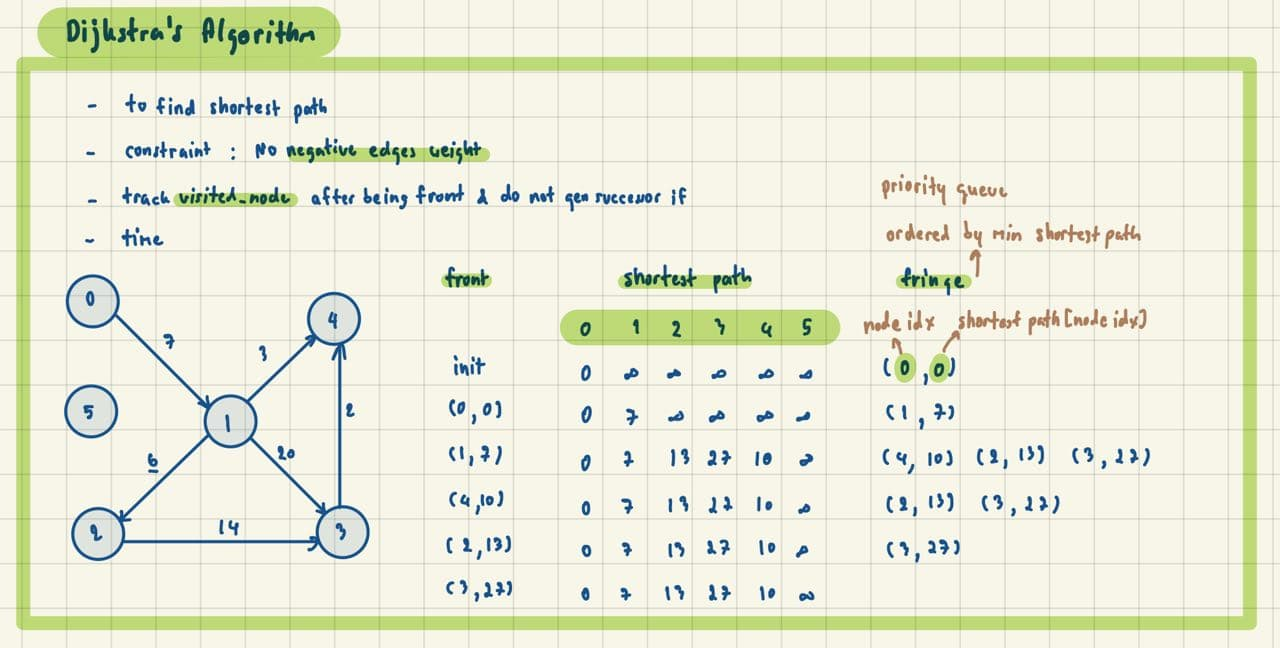

# Solution 1 : use array as fringe

In [1]:
# Time = O((V+E)*V*log(V))
# Space = O(V)
def dijkstrasAlgorithm(start, edges):
  shortest_path = [float('inf')] * len(edges)
  shortest_path[start] = 0
  # init fringe
  fringe = [[start, shortest_path[start]]]
  visited = set()
  
  while len(fringe) > 0:
    front = fringe.pop()
    if front[0] in visited:
      continue
    visited.add(front[0])
    shortest_path[front[0]] = front[1]

    # gen & insert successor
    for edge in edges[front[0]]:
      fringe.append([edge[0], front[1] + edge[1]])
  
    fringe = sorted(fringe, key=lambda x: x[1], reverse=True)

  return list(map(lambda x: -1 if x == float('inf') else x, shortest_path))

In [2]:
start = 0
edges = [
  [[1, 7]],
  [[2, 6], [3, 20], [4, 3]],
  [[3, 14]],
  [[4, 2]],
  [],
  [],
]
dijkstrasAlgorithm(start, edges)

[0, 7, 13, 27, 10, -1]

# Solution 2 : use min heap as fringe

In [3]:
class MinHeap:
  def __init__(self, array):
    self.node_position_in_heap = {node[0]:node[0] for node in array}
    self.heap = self.buildHeap(array)
  
  # time = O(n), space = O(1)
  def buildHeap(self, array):
    last_parent_idx = (len(array) - 2) // 2
    for idx in reversed(range(last_parent_idx + 1)):
      self.siftDown(idx, array)
    return array
  
  # time = O(log n), space = O(1)
  def siftDown(self, idx, heap):
    child_one_idx = (2 * idx) + 1
    child_two_idx = (2 * idx) + 2
    end_idx = len(heap) - 1
    while child_one_idx <= end_idx:
      if child_two_idx <= end_idx and heap[child_two_idx][1] < heap[child_one_idx][1]: # modified heap
        idx_to_swap = child_two_idx
      else: 
        idx_to_swap = child_one_idx

      if heap[idx_to_swap][1] < heap[idx][1]:
        self.swap(idx, idx_to_swap, heap) # modified heap
        idx = idx_to_swap
        child_one_idx = (2 * idx) + 1
        child_two_idx = (2 * idx) + 2
      else:
        return
  
  # time = O(log n), space = O(1)
  def siftUp(self, idx, heap):
    parent_idx = (idx - 1) // 2
    while heap[idx][1] < heap[parent_idx][1] and idx > 0:
      self.swap(idx, parent_idx, heap)
      idx = parent_idx
      parent_idx = (idx - 1) // 2

  # time = O(1), space = O(1)
  def peek(self):
    return self.heap[0]

  # time = O(log n), space = O(1)
  def remove(self, idx = 0):
    self.swap(idx, -1, self.heap)
    removed_value = self.heap.pop()
    self.node_position_in_heap.pop(removed_value[0]) # modified heap
    self.siftDown(idx, self.heap)
    return removed_value

  # time = O(log n), space = O(1)
  def insert(self, value):
    self.heap.append(value)
    self.siftUp(len(self.heap) - 1, self.heap)

  # time = O(1), space = O(1)
  # modified heap
  def swap(self, i, j, heap):
    self.node_position_in_heap[heap[i][0]] = j
    self.node_position_in_heap[heap[j][0]] = i
    heap[i], heap[j] = heap[j], heap[i]

In [4]:
# Apply heap
# Time = O((V+E)*log(V))
# Space = O(V)
def dijkstrasAlgorithm(start, edges):
  shortest_path = [float('inf')] * len(edges)
  shortest_path[start] = 0
  fringe = MinHeap([[start, shortest_path[start]]])
  visited = set()
  
  while len(fringe.heap) > 0:
    front = fringe.remove()
    if front[0] in visited:
      continue
    visited.add(front[0])
    shortest_path[front[0]] = front[1]

    # gen & insert successor
    for edge in edges[front[0]]:
      fringe.insert([edge[0], front[1] + edge[1]])
  
  return list(map(lambda x: -1 if x == float('inf') else x, shortest_path))

In [5]:
start = 0
edges = [
  [[1, 7]],
  [[2, 6], [3, 20], [4, 3]],
  [[3, 14]],
  [[4, 2]],
  [],
  [],
]
dijkstrasAlgorithm(start, edges)

[0, 7, 13, 27, 10, -1]